In [64]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib as plot
import nltk

In [2]:
# read the file 
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
#lower the col name
df.columns= df.columns.str.lower()
df

,unnamed: 0,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [10]:
# keep only the useful cols
df1 = df[['title','review text','rating', 'division name','department name']]
df1

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


In [11]:
df1.shape

(23486, 5)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [13]:
df1.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [25]:
#group by division
df_grouped = df1.groupby(["division name","department name"]).mean()
df_grouped

rating
division name  department name          
General        Bottoms          4.268686
               Dresses          4.163003
               Jackets          4.240310
               Tops             4.148749
               Trend            3.822917
General Petite Bottoms          4.329356
               Dresses          4.133256
               Intimate         4.240343
               Jackets          4.304910
               Tops             4.216469
               Trend            3.782609
Initmates      Intimate         4.286285

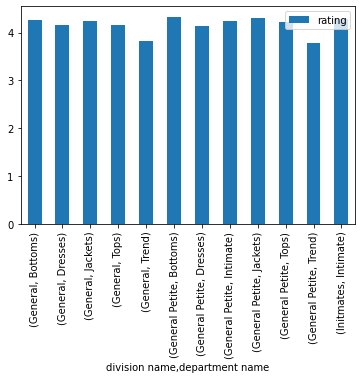

In [32]:
# chart
ax = df_grouped.plot.bar()

In [44]:
# test the textblob
comment = TextBlob(df1.at[2, 'review text'])
comment.sentiment

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [41]:
df1.head(11)

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses


In [77]:
# try to check if the sentiment really represents the comment on the site
text = TextBlob(df1.at[4, 'review text'])
text

TextBlob("This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!")

In [65]:
# import the package
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreatognoli/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [78]:
# devide trhe text into sentences
text.sentences

[Sentence("This shirt is very flattering to all due to the adjustable front tie."),
 Sentence("it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan."),
 Sentence("love this shirt!!"),
 Sentence("!")]

In [79]:
# check the sentiment
text.sentiment

Sentiment(polarity=0.512890625, subjectivity=0.56875)

In [63]:
# drop review equal to na
df1 = df1.dropna(subset = ['review text'])
len(df1)

22641

In [82]:
# try but if not working is returning none
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [93]:
# get the polatity of all the 
df1['polarity']= df1['review text'].apply(sentiment).apply(lambda x:x[0])
df1

<ipython-input-93-101a89b99c40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity']= df1['review text'].apply(sentiment).apply(lambda x:x[0])


,title,review text,rating,division name,department name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222


In [94]:
# group and show polarity
grouped_polarity = df1.groupby(["division name","department name"])['polarity'].min().to_frame()
grouped_polarity

polarity
division name  department name          
General        Bottoms         -0.533333
               Dresses         -0.916667
               Jackets         -0.750000
               Tops            -0.975000
               Trend           -0.270833
General Petite Bottoms         -0.257778
               Dresses         -0.400000
               Intimate        -0.575000
               Jackets         -0.562500
               Tops            -0.700000
               Trend           -0.083333
Initmates      Intimate        -0.392333

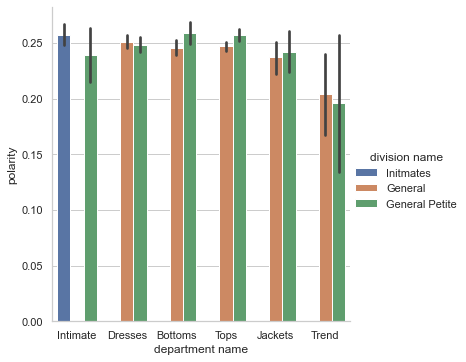

In [100]:
# display the data
import seaborn as sns
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df1, kind="bar",
    x="department name", y="polarity", hue="division name")

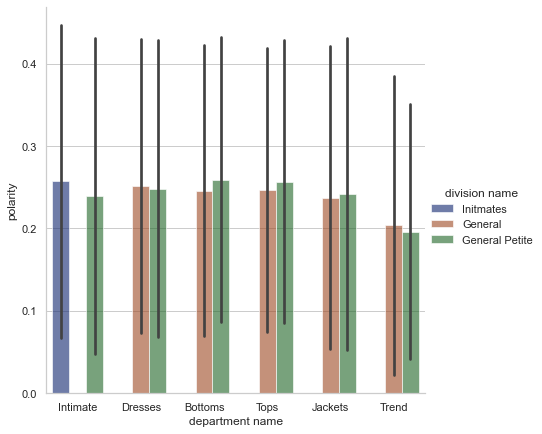

<AxesSubplot:xlabel='division name,department name'>

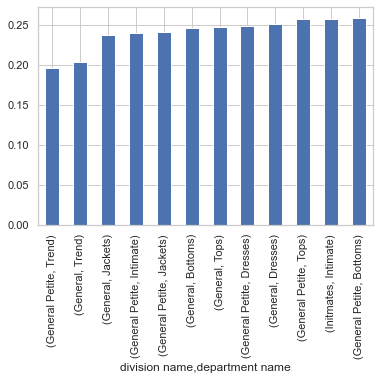

In [103]:
# plot the data
df1.groupby(["division name","department name"])['polarity'].mean().sort_values().plot.bar()